In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

2024-12-05 22:17:32.577834: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
    
)

data_path = "./EuroSAT"

data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'] 

)

Found 27000 images belonging to 10 classes.


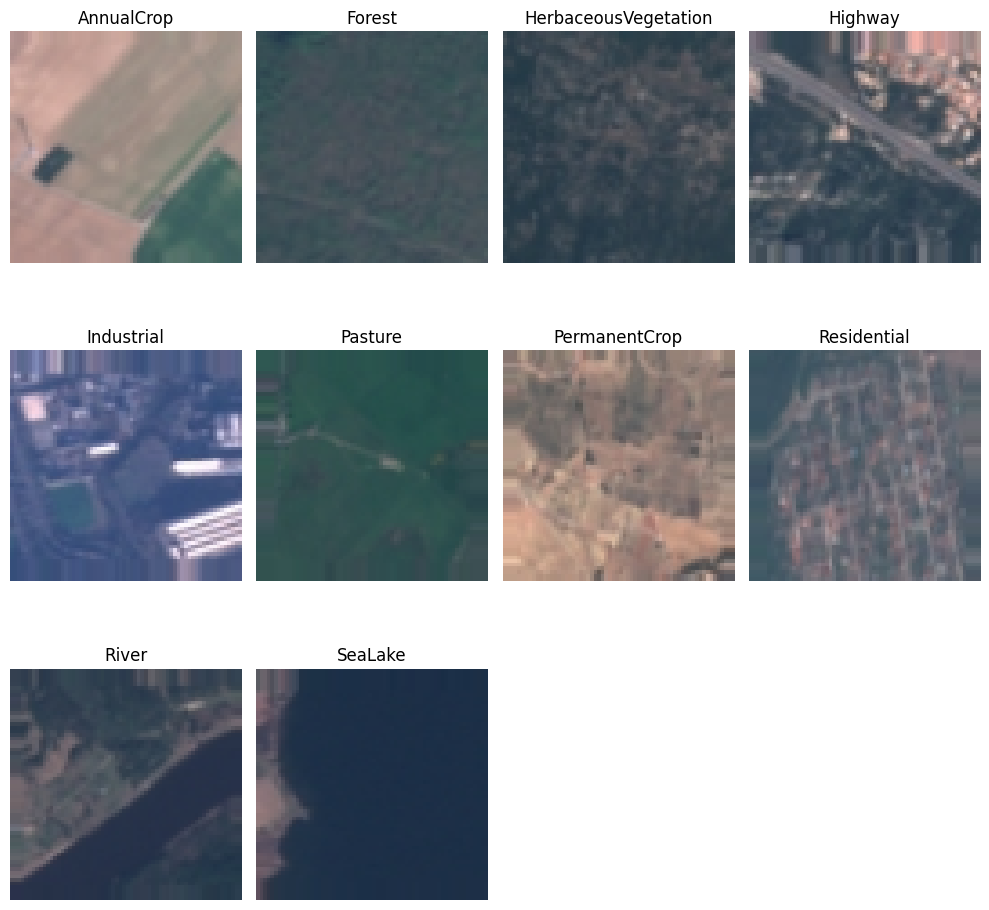

In [3]:
batch_images, batch_labels = next(data)


class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
                'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

plt.figure(figsize=(10, 10))

# Loop through each class and display one sample image
for i, label in enumerate(class_labels):
    # Find the index of the first occurrence of the label
    class_index = np.argmax(batch_labels, axis=1) == i  # True for the images of this class
    class_image = batch_images[class_index][0]  # Select the first image of that class

    # Plot the image
    plt.subplot(3, 4, i + 1) 
    plt.imshow(class_image)
    plt.title(label)
    plt.axis('off')  

plt.tight_layout() 
plt.show()


In [4]:
train_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical',
    subset='training',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
)

Found 21600 images belonging to 10 classes.


In [5]:
test_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=1,
    subset='validation',
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
    
)

Found 5400 images belonging to 10 classes.


In [6]:
from tensorflow.keras.utils import plot_model
from tensorflow import keras

CNN = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])


plot_model(CNN, to_file='optimized_cnn_model.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [7]:
CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
!pip list | grep Pillow

In [8]:
CNN.fit(train_data, validation_data=test_data, epochs=3)

Epoch 1/3


2024-12-05 22:17:56.847697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2699/2700 [============================>.] - ETA: 0s - loss: 1.3521 - accuracy: 0.5216

2024-12-05 22:19:02.139859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2700/2700 [==============================] - 77s 28ms/step - loss: 1.3524 - accuracy: 0.5214 - val_loss: 1.3639 - val_accuracy: 0.5472
Epoch 2/3
2700/2700 [==============================] - 76s 28ms/step - loss: 1.0315 - accuracy: 0.6400 - val_loss: 0.6994 - val_accuracy: 0.7537
Epoch 3/3
2700/2700 [==============================] - 77s 29ms/step - loss: 0.9036 - accuracy: 0.6892 - val_loss: 1.9938 - val_accuracy: 0.5398


In [11]:
CNN.evaluate(test_data)

  72/5400 [..............................] - ETA: 11s - loss: 0.6574 - accuracy: 0.7500   

2024-12-05 13:00:22.207525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5400/5400 [==============================] - 12s 2ms/step - loss: 0.7186 - accuracy: 0.7557


[0.7185655236244202, 0.755740761756897]

  23/5400 [..............................] - ETA: 12s  

2024-12-05 13:00:50.848382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5400/5400 [==============================] - 12s 2ms/step


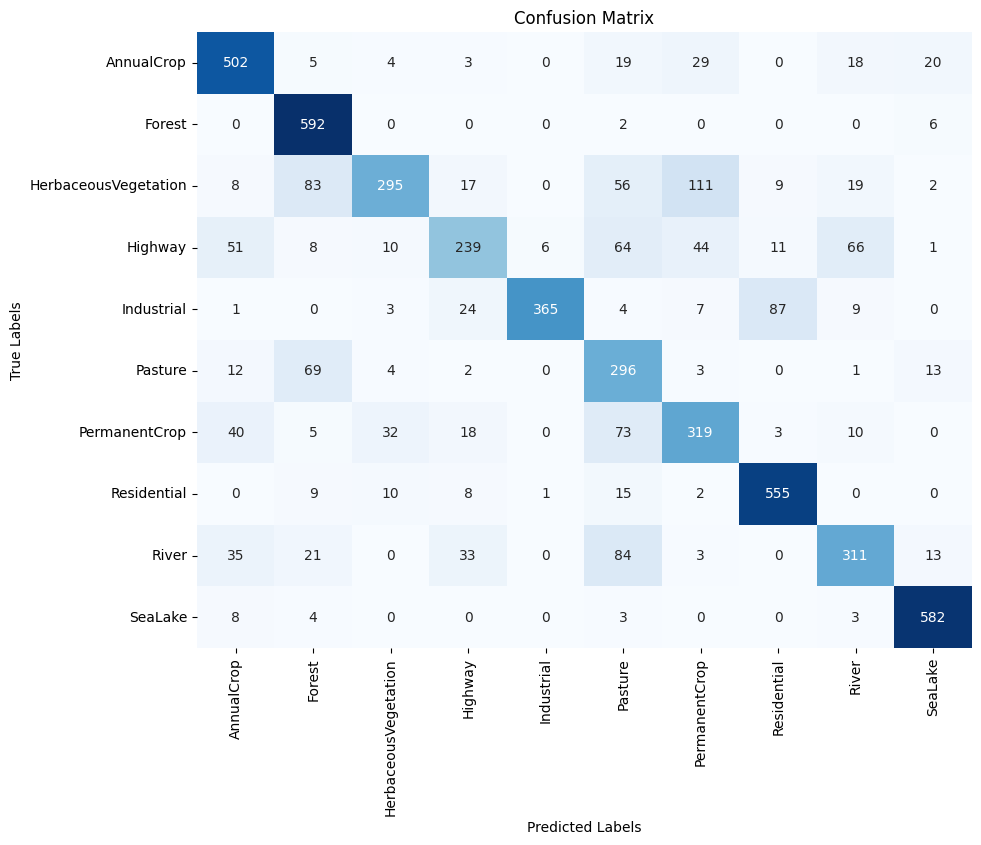

Classification Report: 
                       precision    recall  f1-score   support

          AnnualCrop       0.76      0.84      0.80       600
              Forest       0.74      0.99      0.85       600
HerbaceousVegetation       0.82      0.49      0.62       600
             Highway       0.69      0.48      0.57       500
          Industrial       0.98      0.73      0.84       500
             Pasture       0.48      0.74      0.58       400
       PermanentCrop       0.62      0.64      0.63       500
         Residential       0.83      0.93      0.88       600
               River       0.71      0.62      0.66       500
             SeaLake       0.91      0.97      0.94       600

            accuracy                           0.75      5400
           macro avg       0.76      0.74      0.74      5400
        weighted avg       0.77      0.75      0.75      5400



In [12]:


class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
                'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

y_true = []
for i in range(test_data.samples // test_data.batch_size):
    _, batch_labels = next(test_data)
    y_true.extend(np.argmax(batch_labels, axis=-1))

# Generate predictions for test data
steps = int(np.ceil(test_data.samples / test_data.batch_size))  # Convert to int
y_probab = CNN.predict(test_data, steps=steps)

# Generate predicted classes for test data
y_pred = np.argmax(y_probab, axis=-1)

# Generate confusion matrix with class labels
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report with class labels
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report: \n", report)


In [12]:
# Save the model to a file
# CNN.save('eurosat_land_classification_model.h5')

In [1]:
from tensorflow.keras.models import load_model

# Load the model
model_path = 'cnn_model.h5'
loaded_model = load_model(model_path)

# Now you can use `loaded_model` to make predictions or further train the model

In [20]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import base64

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
                'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

# Example images for each class (replace with actual file paths or URLs)
example_images = {
    'AnnualCrop': './EuroSAT/AnnualCrop/AnnualCrop_123.jpg',
    'Forest': './EuroSAT/Forest/Forest_1.jpg',
    'HerbaceousVegetation': './EuroSAT/HerbaceousVegetation/HerbaceousVegetation_1.jpg',
    'Highway': './EuroSAT/Highway/Highway_1.jpg',
    'Industrial': './EuroSAT/Industrial/Industrial_172.jpg',
    'Pasture': './EuroSAT/Pasture/Pasture_18.jpg',
    'PermanentCrop': './EuroSAT/PermanentCrop/PermanentCrop_112.jpg',
    'Residential': './EuroSAT/Residential/Residential_1.jpg',
    'River': './EuroSAT/River/River_144.jpg',
    'SeaLake': './EuroSAT/SeaLake/SeaLake_132.jpg'
}

# Confusion matrix images (replace with actual file paths or URLs)
confusion_matrix_images = [
    './CM_CNN_Normalization.png',
    './CM_Dropout.png'
]

# Function to make predictions
def predict_image(img):
    # Preprocess the image
    img = img.resize((64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image

    # Make prediction
    predictions = loaded_model.predict(img_array)
    predicted_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions)

    return f"Predicted: {predicted_class} with confidence {confidence:.2f}"

# Encode the image to base64
def encode_image_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')
Problem_Statement = encode_image_to_base64('./Problem-Statment.png')
Model_Explanation = encode_image_to_base64('./napkin-selection.png')

# Custom CSS for styling
custom_css = """
.center-text {
    text-align: center;
    font-size: 20px;
}

.info-box {
    background-color: rgba(128, 128, 128, 0.5); /* Grey with 50% transparency */
    padding: 1px;
    border-radius: 0px;
    margin: 0px;
}

.article-layout {
    display: flex;
    align-items: center;
    justify-content: space-between;
    margin: 20px;
}

.article-text {
    flex: 1;
    margin-right: 20px;
    font-size: 22px; /* Increase font size for better readability */
}

.article-image {
    flex: 1;
    max-width: 600px; /* Set a maximum width for the image */
    width: 100%;
    height: auto;
    border-radius: 10px;
    object-fit: contain;
}
"""

# Create a Gradio Blocks interface
with gr.Blocks(theme="default", css=custom_css) as demo:
    gr.Markdown("""
    <div class="center-text">
    
    # EuroSAT Land Classification
    Welcome to the EuroSAT Land Classification model interface. This model is designed to classify satellite images into one of ten land use categories. The categories include various types of crops, vegetation, and urban areas. This tool can be used for environmental monitoring, urban planning, and agricultural management.
    </div>
    """)
    gr.Markdown('''<div class="center-text">
    
    # Problem Statement
    </div>''')
    gr.HTML(f"""
    <div class="article-layout">
        <div class="article-text">
            The goal of this project is to accurately classify land use images from the EuroSAT dataset. The dataset consists of 10 different classes, each representing a distinct type of land use. By leveraging deep learning techniques, we aim to achieve high accuracy in classifying these images.
        </div>
        <img src="data:image/png;base64,{Problem_Statement}" class="article-image" alt="Problem Statement">
    </div>
    """)
    
    # Article layout with text on the left and image on the right
    gr.Markdown('''<div class="center-text ">
    
    # Model Explanation''')
    gr.HTML(f"""
    <div class="article-layout">
        <div class="article-text">
            The model is a Convolutional Neural Network (CNN) trained on the EuroSAT dataset. It processes input images and predicts the most likely land use category. The model's architecture includes multiple convolutional layers, batch normalization, and dropout for regularization.
        </div>
        <img src="data:image/png;base64,{Model_Explanation}" class="article-image" alt="Model Architecture">
    </div>
    """)

    gr.Markdown("""
    <div class="center-text">
    
    ## Training Results
    Below are some confusion matrices from the model's training phase, showcasing its performance across different classes.
    </div>
    """)
    with gr.Row():
        for img_path in confusion_matrix_images:
            img = Image.open(img_path)
            gr.Image(value=img, label="Confusion Matrix")
    example_image_path = "./Classes.png"  # Replace with the actual path to the example image
    example_image = Image.open(example_image_path)
    gr.Image(value=example_image, label="Example Image")

    gr.Markdown("## Try it Yourself")
    gr.Interface(
        fn=predict_image,
        inputs=gr.components.Image(type="pil", label="Upload an Image"),
        outputs=gr.components.Textbox(label="Prediction Result"),
        examples=[[example_images[label]] for label in class_labels],
        examples_per_page=10,
        example_labels=class_labels
    ).launch()

# Launch the Blocks interface
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://c0b658d2d45c974811.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator with augmentation for training
data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2  # Use 20% of data for validation
)

data_path = "./EuroSAT"

# Create the training data generator
train_generator = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
             'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
)

# Create the validation data generator
validation_generator = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
             'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
)

# Create the test data generator (if needed separately)
test_generator = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=1,
    class_mode='categorical',
    subset='validation',  # Use the same validation subset for testing
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
             'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


C:\Users\IT Department\AppData\Local\Temp\ipykernel_15576\3263815493.py:13: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


Epoch 1/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 113s 160ms/step - accuracy: 0.6733 - loss: 0.9781 - val_accuracy: 0.7813 - val_loss: 0.6365
Epoch 2/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 74s 110ms/step - accuracy: 0.8108 - loss: 0.5474 - val_accuracy: 0.8235 - val_loss: 0.5294
Epoch 3/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 74s 109ms/step - accuracy: 0.8374 - loss: 0.4766 - val_accuracy: 0.8187 - val_loss: 0.5519
Epoch 4/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 73s 109ms/step - accuracy: 0.8413 - loss: 0.4543 - val_accuracy: 0.8176 - val_loss: 0.5468
Epoch 5/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 72s 107ms/step - accuracy: 0.8520 - loss: 0.4289 - val_accuracy: 0.8241 - val_loss: 0.5193
Epoch 6/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 72s 106ms/step - accuracy: 0.8551 - loss: 0.4058 - val_accuracy: 0.8254 - val_loss: 0.5126
Epoch 7/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 74s 109ms/step - accuracy: 0.8568 - loss: 0.4040 - val_accuracy: 0.8246 - val_loss: 0.5176
Epoch 8/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 72s 107ms/step - accuracy: 0.8638 - loss: 

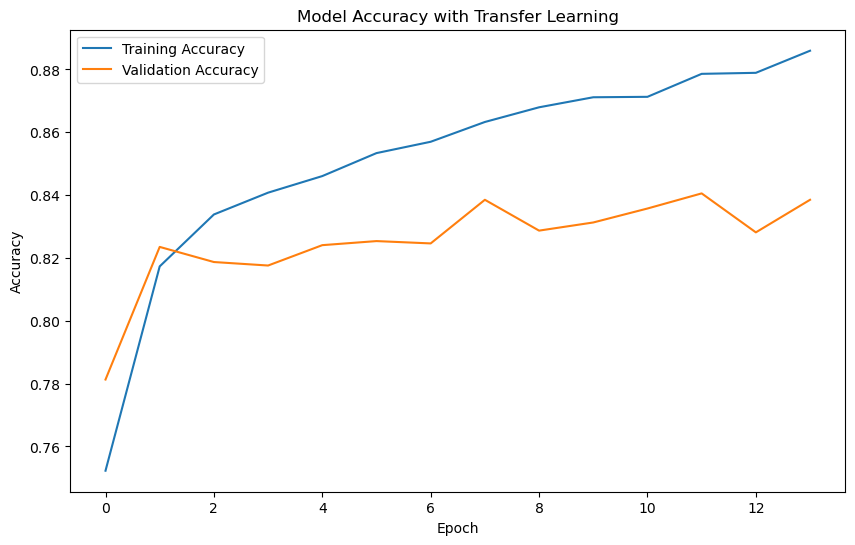

In [6]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2  # Lighter model than ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Enable mixed precision training for faster computation
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Load pre-trained MobileNetV2 model (smaller and faster than ResNet50)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model layers
base_model.trainable = False  # Faster than looping through layers

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)  # Reduced from 256 to 128 nodes
predictions = Dense(10, activation='softmax')(x)

# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a higher learning rate
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Define early stopping callback with reduced patience
early_stopping = EarlyStopping(monitor='val_loss',
                              patience=3,  # Reduced from 5 to 3
                              restore_best_weights=True)

# Train the model with early stopping and reduced epochs
history_transfer = transfer_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,  # Reduced from 50 to 30
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)

# Evaluate the model
transfer_results = transfer_model.evaluate(test_generator)
print(f"Test Loss: {transfer_results[0]:.4f}")
print(f"Test Accuracy: {transfer_results[1]:.4f}")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history_transfer.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Transfer Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:

# Display model summary
transfer_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_1 (Cast)       │ (None, 64, 64, 3) │          0 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ cast_1[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                 

 Total params: 2,753,764 (10.50 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 330,522 (1.26 MB)

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


5400/5400 ━━━━━━━━━━━━━━━━━━━━ 67s 12ms/step


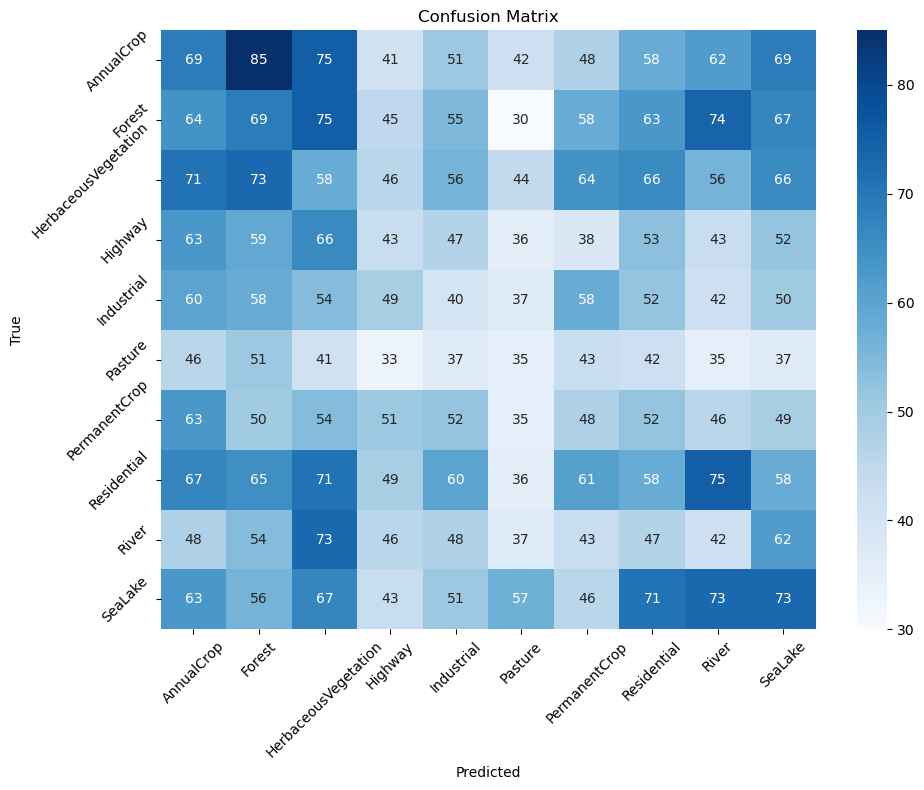

In [15]:
# Generate predictions for test set
y_pred = transfer_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Create and plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


5400/5400 ━━━━━━━━━━━━━━━━━━━━ 66s 12ms/step


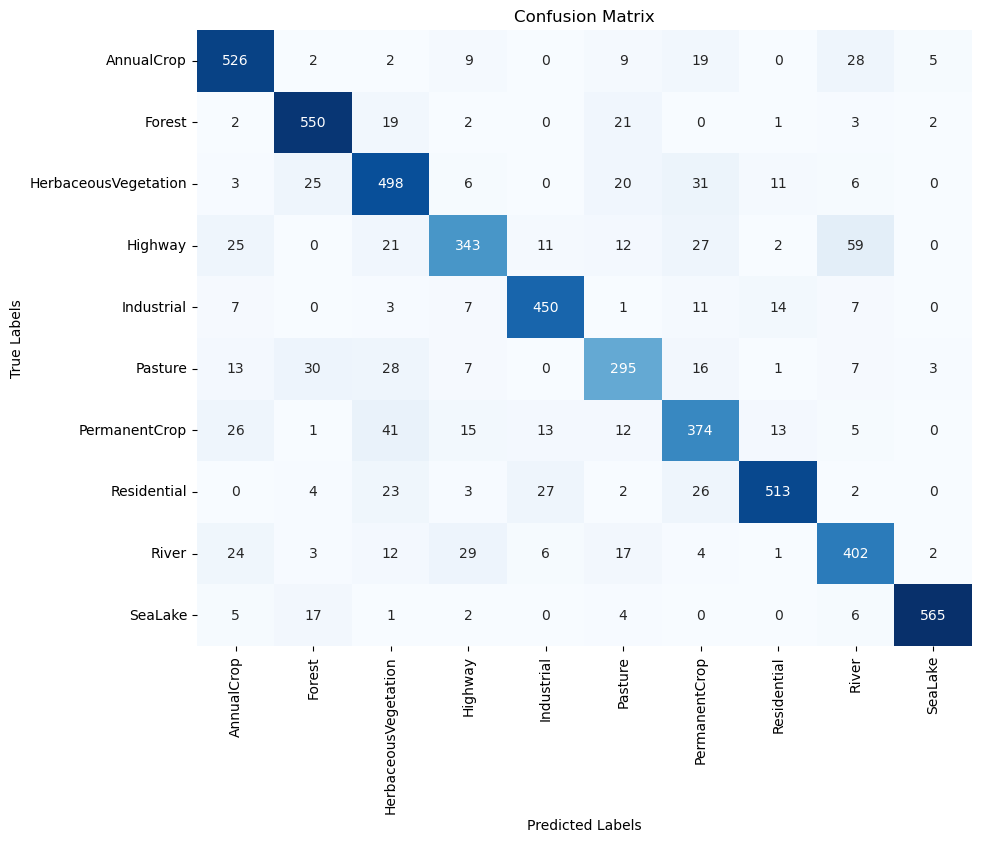

NameError: name 'classification_report' is not defined

In [18]:


class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
                'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

y_true = []
for i in range(test_generator.samples // test_generator.batch_size):
    _, batch_labels = next(test_generator)
    y_true.extend(np.argmax(batch_labels, axis=-1))

# Generate predictions for test data
steps = int(np.ceil(test_generator.samples / test_generator.batch_size))  # Convert to int
y_probab = transfer_model.predict(test_generator, steps=steps)

# Generate predicted classes for test data
y_pred = np.argmax(y_probab, axis=-1)

# Generate confusion matrix with class labels
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




In [19]:
from sklearn.metrics import classification_report
# Generate classification report with class labels
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report: \n", report)


Classification Report: 
                       precision    recall  f1-score   support

          AnnualCrop       0.83      0.88      0.85       600
              Forest       0.87      0.92      0.89       600
HerbaceousVegetation       0.77      0.83      0.80       600
             Highway       0.81      0.69      0.74       500
          Industrial       0.89      0.90      0.89       500
             Pasture       0.75      0.74      0.74       400
       PermanentCrop       0.74      0.75      0.74       500
         Residential       0.92      0.85      0.89       600
               River       0.77      0.80      0.78       500
             SeaLake       0.98      0.94      0.96       600

            accuracy                           0.84      5400
           macro avg       0.83      0.83      0.83      5400
        weighted avg       0.84      0.84      0.84      5400

